# Table Of Content
- [installation of dependencies](#install_deps)  
- [installation of main package](#install_main)  
- [starting the notebook](#start)  
- [download test data](#download)  
- [DEM preparation](#demprep)  
  * [GAMMA](#demprep_gamma)  
  * [SNAP](#demprep_snap)
- [Processing](#proc) 
  * [GAMMA](#proc_gamma)  
  * [SNAP](#proc_snap)  
- [CORINE preparation](#corine)  
- [Comparison of backscatter with local angle of incidence](#sar_inc)  
  * [GAMMA](#sar_inc_gamma)  
  * [SNAP](#sar_inc_snap)  
- [Computation of DEM Slope and Aspect](#slope_aspect)  
- [Analysis of DEM Slope-Aspect Distribution](#dem_distribution)  
- [Todo](#todo) 

# prerequisites
In some of the following cells directories and files are going to be created. The currect structure is organized such that a main directory exists in which the sub-directories and files are stored.  
Files specific to a Sentinel-1 scene will contain a unique prefix in their name, which consists of the sensor identifier, the acquisition mode, the orbit and the acquisition start time.  
The code directory can be used to clone the GitHub repository ( see later step).  
The following describes an exemplary structure with directories in bold letters.  
* **S1_ARD**
  * **data**
    * **CORINE**
      * e.g. ```clc2018_clc2018_V2018.20b2.tif```
    * **DEM**
      * e.g. ```S1A__IW___A_20180829T170656_dem_gamma_AW3D30```
    * **GAMMA**
      * **e.g. ```S1A__IW___A_20180829T170656_AW3D30```**
        * e.g. ```S1A__IW___A_20180829T170656_VV_grd_mli_norm_geo_db.tif```
    * **SNAP**
      * **e.g. ```S1A__IW___A_20180829T170656_AW3D30```**
        * e.g. ```S1A__IW___A_20180829T170656_VV_bnr_Orb_Cal_TF_TC_dB.tif```
    * e.g. ```S1A_IW_GRDH_1SDV_20180829T170656_20180829T170721_023464_028DE0_F7BD.zip```
  * **code**
    * **.git**
    * **S1_ARD**
    * data_prepare.ipynb
    * ..

<a id='install_deps'></a>
# install the current spatialist and pyroSAR development branches

```shell
# install git for package versioning
sudo apt-get install git

# uninstall in case the packages have been installed before
python -m pip uninstall spatialist pyroSAR

# install the latest package development versions
python -m pip install git+https://github.com/johntruckenbrodt/spatialist.git@master
python -m pip install git+https://github.com/johntruckenbrodt/pyroSAR.git@master
```

<a id='install_main'></a>
# install/update the S1_ARD package

```shell
# change to the code sub-directory
cd code

# (first start only) clone the GitHub repository
git clone https://github.com/johntruckenbrodt/S1_ARD.git

# change into the cloned directory
cd S1_ARD

# update the project if it has been cloned before
git pull

# install additional dependencies
python -m pip install -r requirements.txt

# add the code location to the PATH environment
export PATH=$PATH:$(pwd)

# change back to main dir
cd ../..
```
## Note
For convenience the code location is best permanently added to the PATH environment by adding a line to the .bashrc file:
```shell
export PATH=$PATH:/path/to/S1_ARD/code
```

<a id='start'></a>
# starting the notebook

```shell
# first start jupyter and then select the notebook from the browser menu
jupyter notebook
```

<a id='download'></a>
# download test data

```shell
# change to the data directory
cd data

wget -c -T120 --no-check-certificate --user="username" --password="password" \
-O S1A_IW_GRDH_1SDV_20180829T170656_20180829T170721_023464_028DE0_F7BD.zip \
"https://scihub.copernicus.eu/dhus/odata/v1/Products('1d498b6b-f890-4c3f-a30e-877338e9f2fe')/\$value"
```

# define the working directory and identify the SAR scene

In [21]:
maindir = '/home/truc_jh/Desktop/S1_ARD/data'

import os
from pyroSAR import identify

filename = os.path.join(maindir, 'S1A_IW_GRDH_1SDV_20180829T170656_20180829T170721_023464_028DE0_F7BD.zip')

id = identify(filename)

print(id)

pyroSAR ID object of type SAFE
acquisition_mode: IW
cycleNumber: 148
frameNumber: 167392
lines: 16703
orbit: A
orbitNumber_abs: 23464
orbitNumber_rel: 117
polarizations: ['VV', 'VH']
product: GRD
projection: +proj=longlat +datum=WGS84 +no_defs 
samples: 26056
sensor: S1A
spacing: (10.0, 10.0)
start: 20180829T170656
stop: 20180829T170721


<a id='demprep'></a>
# DEM preparation

<a id='demprep_gamma'></a>
## DEM preparation: GAMMA

documentation:
- [pyroSAR.identify](https://pyrosar.readthedocs.io/en/latest/pyroSAR.html#pyroSAR.drivers.identify)
- function dem_autocreate is not documented on readthedocs yet, but a docstring can be called in Python: `help(dem_autocreate)`
- the download of TanDEM-X 90m DEMs requires a registration, see [here](https://geoservice.dlr.de/web/dataguide/tdm90) for details; once registered the credentials can be passed to function dem_autocreate; for the other DEM options they are ignored

In [22]:
from pyroSAR.gamma.srtm import dem_autocreate

demfiles_gamma = {}
for demType in ['AW3D30', 'SRTM 1Sec HGT', 'SRTM 3Sec', 'TDX90m']:
    dem_id = demType.replace(' ', '-')
    dem_base = '{}_dem_gamma_{}'.format(id.outname_base(), dem_id)
    dem_dir = os.path.join(maindir, 'DEM')
    if not os.path.isdir(dem_dir):
        os.makedirs(dem_dir)
    dem = os.path.join(dem_dir, dem_base)
    print(demType)
    with id.bbox() as bbox:
        dem_autocreate(geometry=bbox, 
                       demType=demType, 
                       outfile=dem, 
                       buffer=0.01,
                       username='username', 
                       password='password')
    demfiles_gamma[dem_id] = dem
    print('-' * 10)

AW3D30
outfile already exists
----------
SRTM 1Sec HGT
outfile already exists
----------
SRTM 3Sec
outfile already exists
----------
TDX90m
outfile already exists
----------


/home/truc_jh/PycharmProjects/pyroSAR/pyroSAR/gamma/api.py:18: UserWarning: could not find Gamma installation directory; please set the GAMMA_HOME environment variable
  warnings.warn('could not find Gamma installation directory; please set the GAMMA_HOME environment variable')


<a id='demprep_snap'></a>
## DEM preparation: SNAP

documentation:
- [pyroSAR.auxdata.dem_autoload](https://pyrosar.readthedocs.io/en/latest/pyroSAR.html#pyroSAR.auxdata.dem_autoload)
- [spatialist.gdalwarp](https://spatialist.readthedocs.io/en/latest/spatialist.html#spatialist.auxil.gdalwarp)

In [23]:
from pyroSAR.auxdata import dem_autoload
from spatialist import gdalwarp

demfiles_snap = {}
for demType in ['AW3D30', 'SRTM 1Sec HGT', 'SRTM 3Sec', 'TDX90m']:
    dem_id = demType.replace(' ', '-')
    dem_base = '{}_dem_snap_{}'.format(id.outname_base(), dem_id)
    dem_dir = os.path.join(maindir, 'DEM')
    if not os.path.isdir(dem_dir):
        os.makedirs(dem_dir)
    dem = os.path.join(dem_dir, dem_base + '.tif')
    print(demType)
    if not os.path.isfile(dem):
        with id.bbox() as bbox:
            # download all necessary DEM tiles and connect them in an in-memory VRT file
            print('collecting DEM tiles')
            vrt = dem_autoload(geometries=[bbox], 
                               demType=demType,
                               vrt='/vsimem/{}.vrt'.format(dem_base), 
                               buffer=0.01,
                               username='username', 
                               password='password')
            # create a DEM GTiff file from the VRT
            print('creating mosaic')
            gdalwarp(vrt, dem, options={'format': 'GTiff'})
    else:
        print('outfile already exists')
    demfiles_snap[dem_id] = dem
    print('-' * 10)

AW3D30
outfile already exists
----------
SRTM 1Sec HGT
outfile already exists
----------
SRTM 3Sec
outfile already exists
----------
TDX90m
outfile already exists
----------


<a id='proc'></a>
# Processing

<a id='proc_gamma'></a>
## Processing: GAMMA

documentation:
- [pyroSAR.gamma.geocode](https://pyrosar.readthedocs.io/en/latest/pyroSAR.html#pyroSAR.gamma.geocode)

Upon import the *gamma* submodule searches for an environement variable *GAMMA_HOME*, which needs to point to the main Gamma installation directory.

In [3]:
from pyroSAR import gamma

# parallelize the Gamma commands
os.environ['OMP_NUM_THREADS'] = '6'

for dem_id, dem_file in demfiles_gamma.items():
    scenedir = os.path.join(maindir, 'GAMMA', '{}_{}'.format(id.outname_base(), dem_id))
    print(scenedir)
    gamma.geocode(scene=id, 
                  dem=dem_file,
                  tempdir=os.path.join(scenedir, 'process'), 
                  outdir=scenedir,
                  targetres=90, 
                  scaling='db', 
                  export_extra=['inc_geo'])

/home/john/Desktop/S1_ARD/data/GAMMA/S1A__IW___A_20180829T170656_AW3D30
scene S1A__IW___A_20180829T170656 already processed
/home/john/Desktop/S1_ARD/data/GAMMA/S1A__IW___A_20180829T170656_SRTM-1Sec-HGT
scene S1A__IW___A_20180829T170656 already processed
/home/john/Desktop/S1_ARD/data/GAMMA/S1A__IW___A_20180829T170656_SRTM-3Sec
scene S1A__IW___A_20180829T170656 already processed
/home/john/Desktop/S1_ARD/data/GAMMA/S1A__IW___A_20180829T170656_TDX90m
scene S1A__IW___A_20180829T170656 already processed


<a id='proc_snap'></a>
## Processing: SNAP

documentation:
- [pyroSAR.snap.geocode](https://pyrosar.readthedocs.io/en/latest/pyroSAR.html#pyroSAR.snap.util.geocode)

Upon import the *snap* submodule searches for the SNAP executables and relative to them for several sub-directories to identify the SNAP installation. For this, the SNAP *bin* sub-directory containing the binary executables needs to be contained in the PATH environment. This is best set in the .bashrc:
```shell
export PATH=$PATH:/path/to/snap/bin
```

In [7]:
from pyroSAR import snap

for dem_id, dem_file in demfiles_snap.items():
    scenedir = os.path.join(maindir, 'SNAP', '{}_{}'.format(id.outname_base(), dem_id))
    correct_egm = False if dem_id == 'TDX90m' else True
    print(scenedir.replace(maindir, '.'))
    snap.geocode(infile=id,
                 externalDEMFile=dem_file,
                 externalDEMApplyEGM=correct_egm,
                 outdir=scenedir,
                 tr=90, scaling='db')

./SNAP/S1A__IW___A_20180829T170656_AW3D30
scene S1A__IW___A_20180829T170656 already processed
./SNAP/S1A__IW___A_20180829T170656_SRTM-1Sec-HGT
scene S1A__IW___A_20180829T170656 already processed
./SNAP/S1A__IW___A_20180829T170656_SRTM-3Sec
scene S1A__IW___A_20180829T170656 already processed
./SNAP/S1A__IW___A_20180829T170656_TDX90m
scene S1A__IW___A_20180829T170656 already processed


<a id='corine'></a>
# Prepare CORINE Land Cover product

The product cannot be downloaded automatically but is available [here](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018?tab=download) after registration.  
The product is reprojected and resampled to the exact size of respective SAR products for easier analysis.

In [24]:
import os
from spatialist import Raster, gdalwarp
from spatialist.ancillary import finder

clc = os.path.join(maindir, 'CORINE', 'clc2018_clc2018_V2018.20b2.tif')

patterns = {'GAMMA': 'VV_grd_mli_norm_geo_db.tif',
            'SNAP': 'VV_bnr_Orb_Cal_TF_TC_dB.tif'}

for processor, pattern in patterns.items():
    sarfiles = finder(os.path.join(maindir, processor), ['*{}'.format(pattern)])
    
    for ref in sarfiles:
        clc_sub = ref.replace(pattern, 'clc2018_V2018.20b2.tif')
        print(clc_sub.replace(maindir, '.'))
        
        if not os.path.isfile(clc_sub):
            with Raster(ref) as ras:
                ref_crs = ras.projection
                xres, yres = ras.res
                with ras.bbox() as box:
                    ref_ext = box.extent   
            
            outputBounds = (ref_ext['xmin'], ref_ext['ymin'], ref_ext['xmax'], ref_ext['ymax'])
            
            gdalwarp_opt = {'format': 'GTiff', 'outputBounds': outputBounds, 'multithread': True,
                            'xRes': xres, 'yRes': yres, 'dstSRS': ref_crs, 'resampleAlg': 'mode'}
            
            gdalwarp(src=clc, dst=clc_sub, options=gdalwarp_opt)
        else:
            print('outfile already exists')
        print('-' * 10)

./GAMMA/S1A__IW___A_20180829T170656_AW3D30/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./GAMMA/S1A__IW___A_20180829T170656_SRTM-1Sec-HGT/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./GAMMA/S1A__IW___A_20180829T170656_SRTM-3Sec/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./GAMMA/S1A__IW___A_20180829T170656_TDX90m/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./SNAP/S1A__IW___A_20180829T170656_AW3D30/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./SNAP/S1A__IW___A_20180829T170656_SRTM-1Sec-HGT/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./SNAP/S1A__IW___A_20180829T170656_SRTM-3Sec/S1A__IW___A_20180829T170656_clc2018_V2018.20b2.tif
outfile already exists
----------
./SNAP/S1A__IW___A_20180829T170656_TDX90m/S1A__IW___A_20180829T170656_clc2018_V2018.20b

<a id='sar_inc'></a>
# Comparison of backscatter with local angle of incidence

<a id='sar_inc_gamma'></a>
## GAMMA

AW3D30
SRTM-1Sec-HGT
SRTM-3Sec
TDX90m


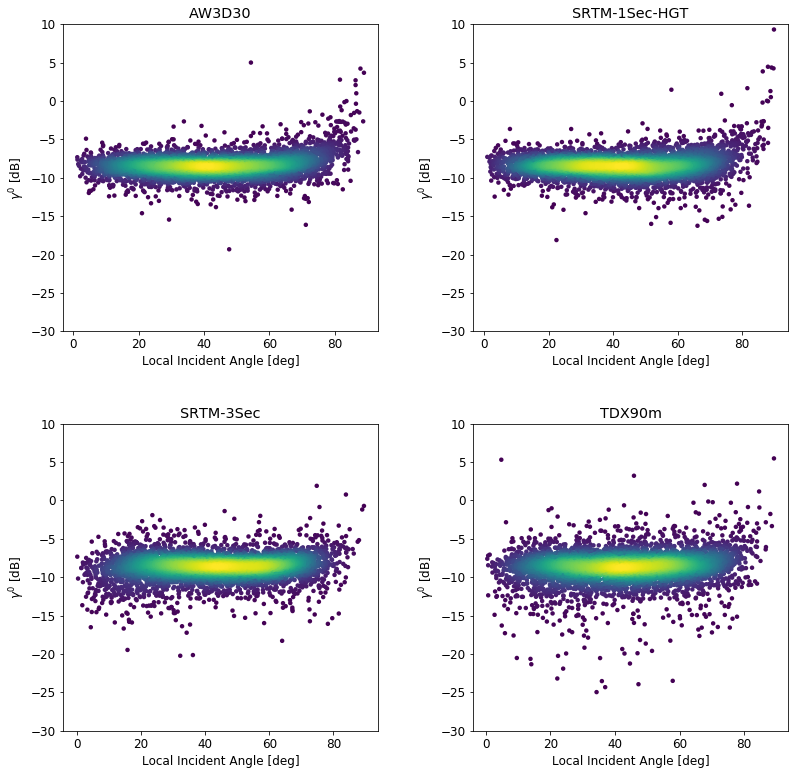

In [10]:
import numpy as np
from S1_ARD import sar_vs_inc
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13, 13)
matplotlib.rcParams['font.size'] = 12
plt.subplots_adjust(wspace=0.3, hspace=0.3)

i = 1
for dem_id in demfiles_gamma.keys():
    print(dem_id)
    scenedir = os.path.join(maindir, 'GAMMA', '{}_{}'.format(id.outname_base(), dem_id))
    sar = os.path.join(scenedir, '{}_VV_grd_mli_norm_geo_db.tif'.format(id.outname_base()))
    inc = os.path.join(scenedir, '{}_inc_geo.tif'.format(id.outname_base()))
    clc = os.path.join(scenedir, '{}_clc2018_V2018.20b2.tif'.format(id.outname_base()))
    
    with Raster(clc) as ras:
        clc_mat = ras.matrix()
    
    # 311: Broad-leaved forest
    # 312: Coniferous forest
    # 313: Mixed forest
    clc_mask = (clc_mat==311) | (clc_mat==312) | (clc_mat==313)
    
    with Raster(sar) as ras:
        sar_mat = ras.matrix()
    
    with Raster(inc) as ras:
        inc_mat = ras.matrix()
    plt.subplot(2, 2, i)
    
    # alternatively plot the masked backscatter
#     sar_mat[sar_mat == -99] = np.nan
#     sar_mat[~clc_mask] = np.nan
#     plt.imshow(sar_mat)
    
    sar_vs_inc(sar_mat, inc_mat, nsamples=5000, title=dem_id, 
               xlabel='Local Incident Angle [deg]', 
               ylabel=r'$\gamma^0$ [dB]',
               ymin=-30, ymax=10,
               mask=clc_mask,
               rad2deg=True)
    i += 1
plt.show()

<a id='sar_inc_snap'></a>
## SNAP

AW3D30
SRTM-1Sec-HGT
SRTM-3Sec
TDX90m


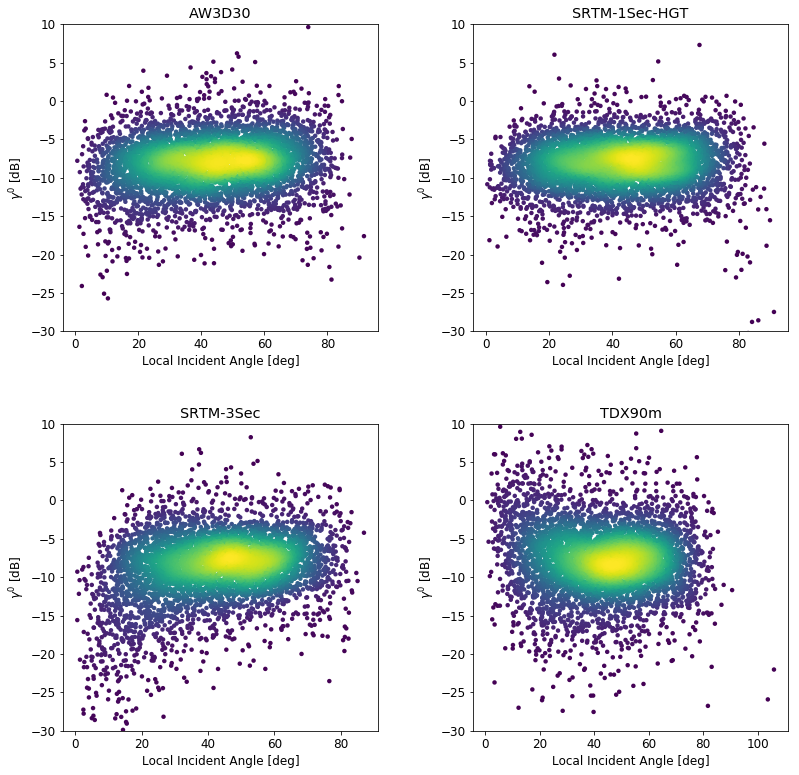

In [26]:
import numpy as np
from S1_ARD import sar_vs_inc
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13, 13)
matplotlib.rcParams['font.size'] = 12
plt.subplots_adjust(wspace=0.3, hspace=0.3)

i = 1
for dem_id in demfiles_gamma.keys():
    print(dem_id)
    scenedir = os.path.join(maindir, 'SNAP', '{}_{}'.format(id.outname_base(), dem_id))
    sar = os.path.join(scenedir, '{}_VV_bnr_Orb_Cal_TF_TC_dB.tif'.format(id.outname_base()))
    inc = os.path.join(scenedir, '{}_localIncidenceAngle.tif'.format(id.outname_base()))
    clc = os.path.join(scenedir, '{}_clc2018_V2018.20b2.tif'.format(id.outname_base()))
    
    with Raster(clc) as ras:
        clc_mat = ras.matrix()
    
    # 311: Broad-leaved forest
    # 312: Coniferous forest
    # 313: Mixed forest
    clc_mask = (clc_mat==311) | (clc_mat==312) | (clc_mat==313)
    
    with Raster(sar) as ras:
        sar_mat = ras.matrix()
    
    with Raster(inc) as ras:
        inc_mat = ras.matrix()
    plt.subplot(2, 2, i)
    
    # alternatively plot the masked backscatter
#     sar_mat[sar_mat == -99] = np.nan
#     sar_mat[~clc_mask] = np.nan
#     plt.imshow(sar_mat)
    
    sar_vs_inc(sar_mat, inc_mat, nsamples=5000, title=dem_id, 
               xlabel='Local Incident Angle [deg]', 
               ylabel=r'$\gamma^0$ [dB]',
               ymin=-30, ymax=10,
               mask=clc_mask,
               rad2deg=False)
    i += 1
plt.show()

<a id='slope_aspect'></a>
# Compute Slope and Aspect

The units of spatial and height resolution must be the same for correct slope computation. Usually the z-factor is used for estimating a conversion factor, yet using one factor for both x and y is inaccurate since the distance in meters of one degree North-South is constant but varies for a degree West-East.  
The height units for all DEMs used here are in meters, the spatial reference system is WGS84 LatLon. The function [spatialist.haversine](https://spatialist.readthedocs.io/en/latest/spatialist.html#spatialist.auxil.haversine) is used by function dem_degree2meter to estimate the resolution of the DEM's center pixel.

In [8]:
from spatialist import Raster
from S1_ARD.util import dem_degree2meter, dem_slope, dem_aspect

for dem_id, dem_file in demfiles_snap.items():
    slope_file = dem_file.replace(dem_id, dem_id + '_slope')
    aspect_file = dem_file.replace(dem_id, dem_id + '_aspect')
    print(dem_id)
    if not os.path.isfile(slope_file):
        print('creating {}'.format(slope_file))
        # compute DEM resolution in meters
        xres_m, yres_m = dem_degree2meter(dem_file)
        
        print('x resolution: {:.8f}'.format(xres_m))
        print('y resolution: {:.8f}'.format(yres_m))
        
        with Raster(dem_file) as ras:
            dem = ras.matrix()
            slope = dem_slope(dem, xres_m, yres_m)
            ras.assign(slope, 0)
            ras.write(slope_file, format='GTiff', dtype='float32')
    
    if not os.path.isfile(aspect_file):
        print('creating {}'.format(aspect_file))
        with Raster(dem_file) as ras:
            dem = ras.matrix()
            aspect = dem_aspect(dem)
            ras.assign(aspect, 0)
            ras.write(aspect_file, format='GTiff', dtype='float32')
    print('-' * 10)

AW3D30
----------
SRTM-1Sec-HGT
----------
SRTM-3Sec
----------
TDX90m
----------


<a id='dem_distribution'></a>
# Analysis of DEM distribution

heading: 345.6892483403786
incidence: 39.05604506859855
AW3D30
SRTM-1Sec-HGT
SRTM-3Sec
TDX90m


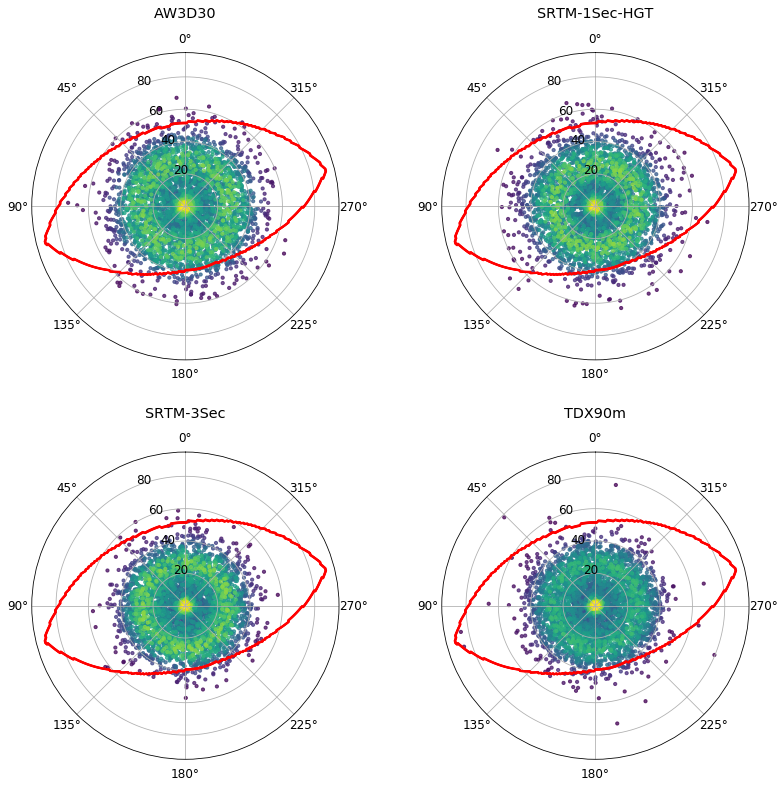

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from S1_ARD import dem_distribution

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13, 13)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.titlepad'] = 20
plt.subplots_adjust(wspace=0.3, hspace=0.3)

incidence = id.meta['incidence']
heading = id.meta['heading']

print('heading: {}'.format(heading))
print('incidence: {}'.format(incidence))

i = 1
for dem_id, dem_file in demfiles_snap.items():
    print(dem_id)
    slope_file = dem_file.replace(dem_id, dem_id + '_slope')
    aspect_file = dem_file.replace(dem_id, dem_id + '_aspect')
    
    with Raster(slope_file) as ras:
        slope = ras.matrix()
    
    with Raster(aspect_file) as ras:
        aspect = ras.matrix()
    
    plt.subplot(2, 2, i, projection='polar')
    dem_distribution(slope, aspect, heading, incidence, nsamples=5000, title=dem_id)
    i += 1
plt.show()

# Analysis of DEM difference
## stack the four DEMs into a 3d array

In [79]:
import numpy as np
from spatialist import Raster
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

demfiles_snap_proc = {}
for dem_id in demfiles_snap.keys():
    print(dem_id)
    scenedir = os.path.join(maindir, 'SNAP', '{}_{}'.format(id.outname_base(), dem_id))
    dem = os.path.join(scenedir, '{}_dem.tif'.format(id.outname_base()))
    demfiles_snap_proc[dem_id] = dem

demstack = np.empty(ras.dim)
with Raster(list(demfiles_snap_proc.values())) as ras:
    for i in range(ras.bands):
        demstack[:,:,i] = ras.matrix(i+1)

AW3D30
SRTM-1Sec-HGT
SRTM-3Sec
TDX90m


## plot the absolute difference of all DEM combinations

<IPython.core.display.Javascript object>


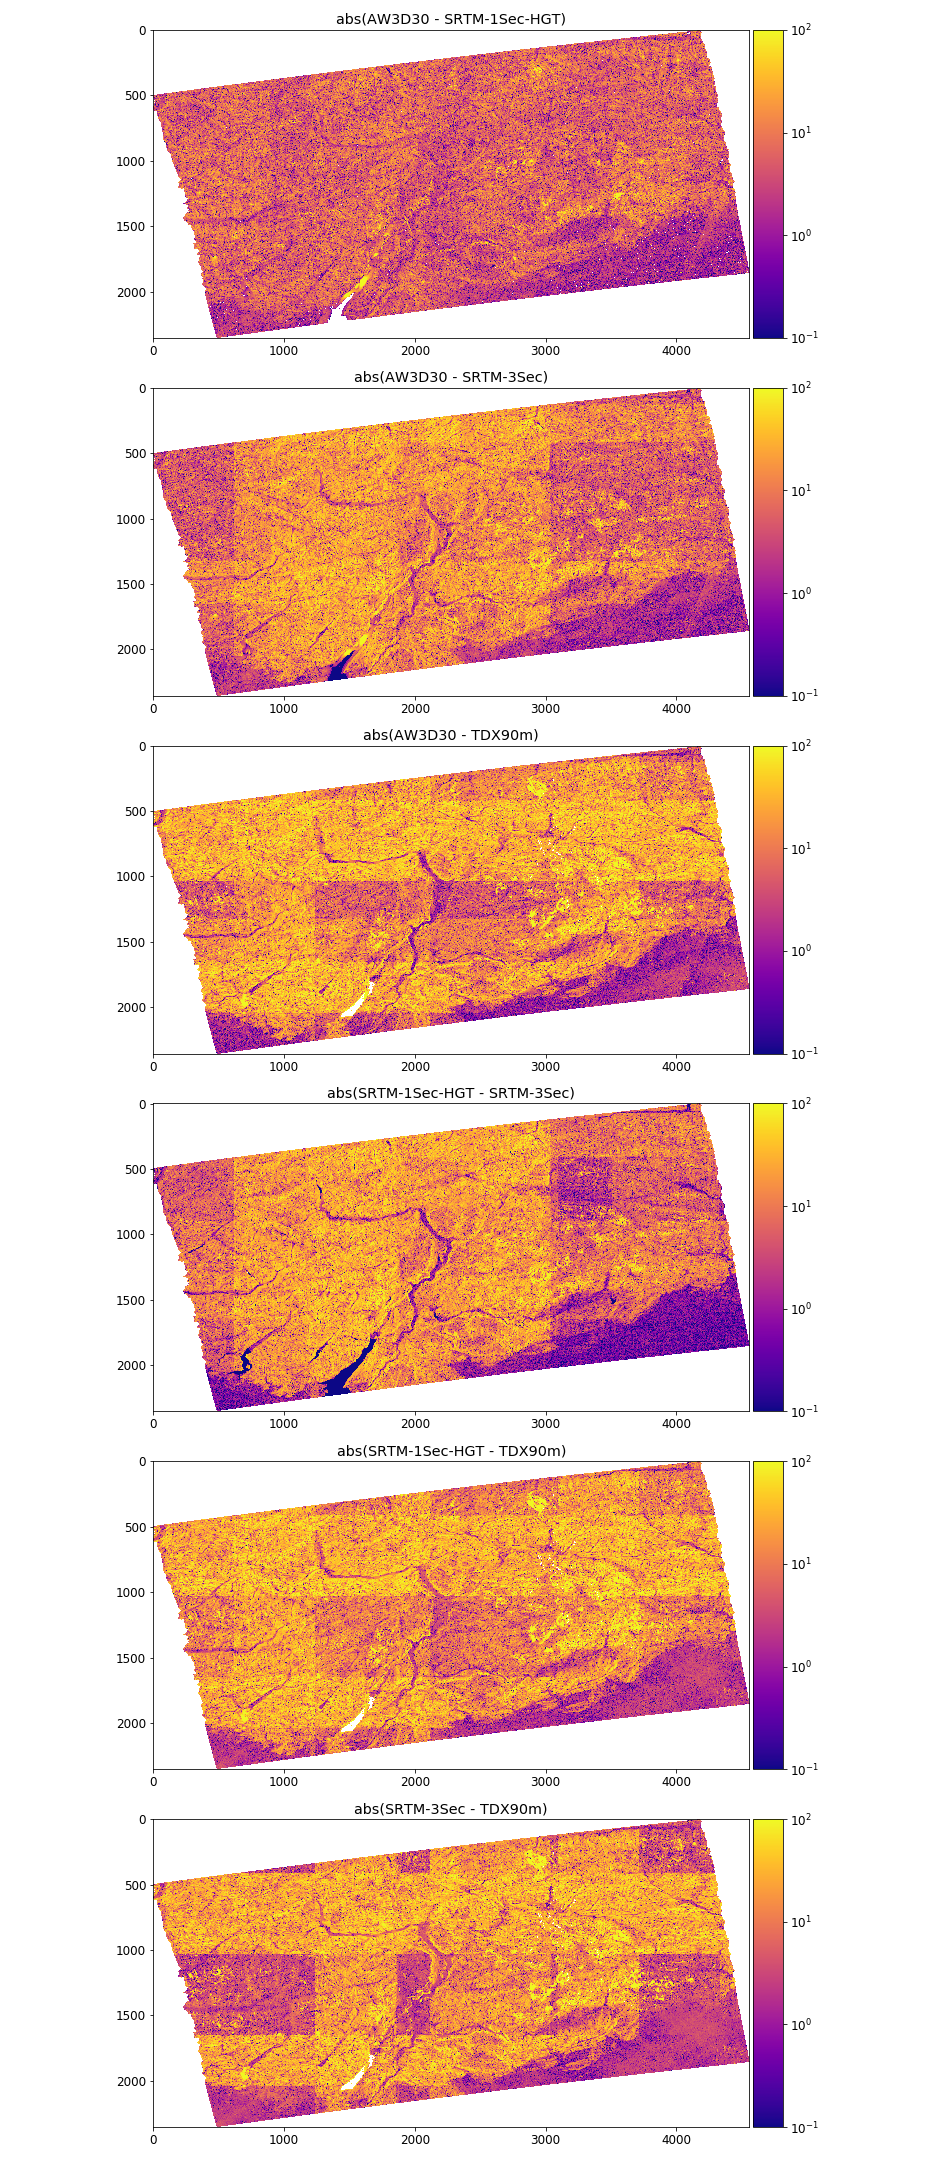

In [90]:
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (13, 30)
matplotlib.rcParams['font.size'] = 12

comp_tuples = [(0, 1), # AW3D30,        SRTM-1Sec-HGT
               (0, 2), # AW3D30,        SRTM-3Sec
               (0, 3), # AW3D30,        TDX90m
               (1, 2), # SRTM-1Sec-HGT, SRTM-3Sec
               (1, 3), # SRTM-1Sec-HGT, TDX90m
               (2, 3)] # SRTM-3Sec,     TDX90m

fig, axes = plt.subplots(6, 1, num='absolute height difference [m]')

dem_keys = list(demfiles_snap_proc.keys())

i = 0
for dem1, dem2 in comp_tuples:
    
    diff = np.abs(demstack[:,:,dem1] - demstack[:,:,dem2])
    dem1_id = dem_keys[dem1]
    dem2_id = dem_keys[dem2]
    ax = axes[i]
    ax.set_title('abs({} - {})'.format(dem1_id, dem2_id))
    
    im = ax.imshow(diff, norm=LogNorm(), cmap='plasma', vmin=0.1, vmax=100.)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(ax.images[0], cax=cax)
    cbar.ax.minorticks_off()
    i += 1
plt.tight_layout()
plt.show()

<a id='todo'></a>
# TODO

- SNAP processing
  * [x] enable writing ancillary products
- GAMMA processing
  * do processing in very steep terrain with different scene (negative incidence angles?)
- DEM comparison
  * [x] implementation of functions to derive aspect and slope for better visualization
  * [x] visualize artifacts in e.g. steep terrain
  * [x] visualize height bias from e.g. lack of ground reference points in photogrammetric DEMs
  * [x] finish implementation of Cristian's plotting function
- comparison SNAP vs. Gamma
  * compare ancillary products
    + [x] DEM after EGM correction
    + [ ] local incidence angle
    + [ ] SAR backscatter before and after normalization
    + [ ] comparability in flat terrain
- comparison ascending vs. descending
  * [ ] select and process scene from descending orbit
